In [1]:
import torch

In [2]:
import torch.nn as nn

In [3]:
import torch.nn.functional as F

In [4]:
from torch.optim import SGD

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.),requires_grad=False)
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output* self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output* self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output+ self.final_bias
        output = F.relu(input_to_final_relu)
        return output

In [8]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [9]:
model = BasicNN()

In [10]:
output_values = model(input_doses)

In [11]:
sns.set(style="whitegrid")

Text(0.5, 0, 'Dose')

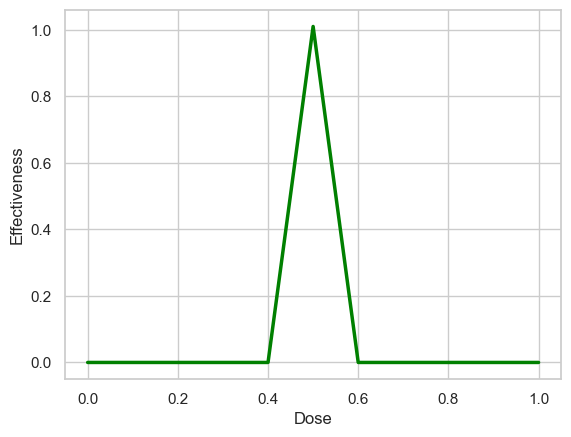

In [12]:
sns.lineplot(x=input_doses,y=output_values, color='green', linewidth=2.5)
plt. ylabel('Effectiveness')
plt.xlabel('Dose')

In [13]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7),requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8),requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6),requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7),requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.),requires_grad=True)
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output* self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output* self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output+ self.final_bias
        output = F.relu(input_to_final_relu)
        return output

Text(0.5, 0, 'Dose')

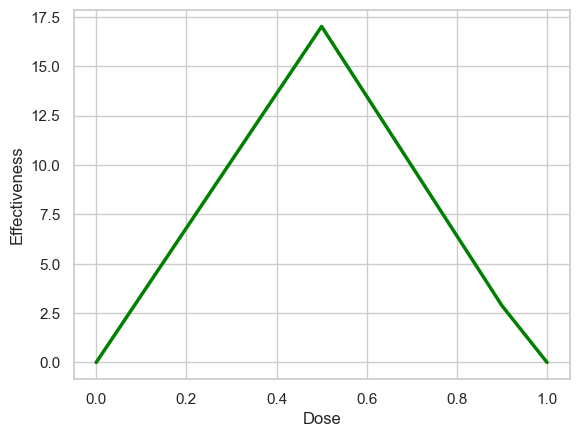

In [14]:
model = BasicNN_train()
output_values = model(input_doses)
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,y=output_values.detach(), color='green', linewidth=2.5)
plt. ylabel('Effectiveness')
plt.xlabel('Dose')

In [15]:
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

In [19]:
optimizer = SGD(model.parameters(), lr = 0.04)
for epoch in range(100):
    total_loss = 0
    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]
        output_i = model(input_i)
        loss = (output_i - label_i)**2
        loss.backward()
        total_loss += float(loss)
    if(total_loss<0.0001):
        print("Num steps: "+str(epoch)) 
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Step: " + str(epoch) + "Final Bias: " + str(model.final_bias.data) + "\n")

Step: 0Final Bias: tensor(-3.9773)

Step: 1Final Bias: tensor(-4.9399)

Step: 2Final Bias: tensor(-5.8255)

Step: 3Final Bias: tensor(-6.6403)

Step: 4Final Bias: tensor(-7.3899)

Step: 5Final Bias: tensor(-8.0795)

Step: 6Final Bias: tensor(-8.7139)

Step: 7Final Bias: tensor(-9.2976)

Step: 8Final Bias: tensor(-9.8346)

Step: 9Final Bias: tensor(-10.3286)

Step: 10Final Bias: tensor(-10.7831)

Step: 11Final Bias: tensor(-11.2013)

Step: 12Final Bias: tensor(-11.5860)

Step: 13Final Bias: tensor(-11.9399)

Step: 14Final Bias: tensor(-12.2655)

Step: 15Final Bias: tensor(-12.5651)

Step: 16Final Bias: tensor(-12.8407)

Step: 17Final Bias: tensor(-13.0942)

Step: 18Final Bias: tensor(-13.3275)

Step: 19Final Bias: tensor(-13.5421)

Step: 20Final Bias: tensor(-13.7395)

Step: 21Final Bias: tensor(-13.9212)

Step: 22Final Bias: tensor(-14.0883)

Step: 23Final Bias: tensor(-14.2420)

Step: 24Final Bias: tensor(-14.3834)

Step: 25Final Bias: tensor(-14.5136)

Step: 26Final Bias: tensor(-14.

Text(0.5, 0, 'Dose')

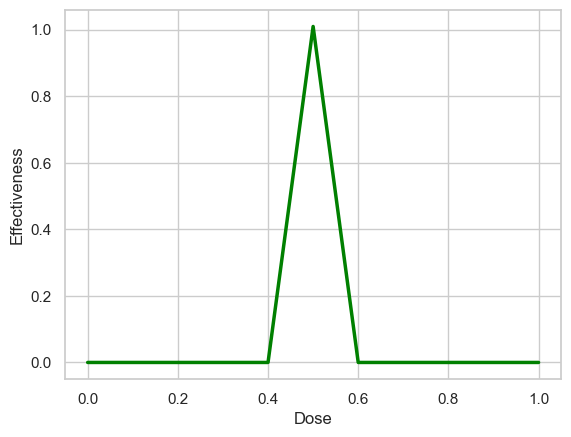

In [20]:
output_values = model(input_doses)
sns.set(style="whitegrid")
sns.lineplot(x=input_doses,y=output_values.detach(), color='green', linewidth=2.5)
plt. ylabel('Effectiveness')
plt.xlabel('Dose')